<a href="https://colab.research.google.com/github/jiorjioo/KelasMahir-3.0/blob/main/Final_Project_Balma_Bahira_Adzkia_2000018257.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT KELAS MAHIR PSDS 3.0**


## ***Summaries***

Tugas: Eksplorasi metode KNN dengan berbagai macam rumus/ fungsi jarak seperti Manhattan, Minkowski, Chebyshev, Bray-Curtiz, dan Canberra.

Alur:
1. Import library yang dibutuhkan
2. Import/ load dataset yang digunakan
3. Cek missing data
4. Konversi categorical data menjadi numeric
5. Scaling data
6. Menentukan nilai variabel X dan y
7. Menentukan test dan training data
8. Perhitungan dengan berbagai fungsi jarak 
9. Visualisasi data
10. Analisis dan kesimpulan

## ***Steps***

### **A. PREPS**

**1. Import library yang dibutuhkan**

In [ ]:
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split         # Library untuk splitting data (data test dan data train)
import numpy as np                                           # Library numerik python
import pandas as pd                                          # Library manipulasi dan analisis data python
from collections import Counter                              # Library untuk menghitung elemen yang paling banyak dalam suatu series
import matplotlib.pyplot as plt                              # Library visualisasi data
import seaborn as sns                                        # Library visualisasi data (seaborn)
import time

**2. Load dataset yang akan digunakan**

In [ ]:
# IMPORT DATA SET
# Dataset yang digunakan: 50 best selling books on Amazon 2009-2019

data = pd.read_csv('https://raw.githubusercontent.com/jiorjioo/treasure/main/bestsellers%20with%20categories.csv')
df = pd.DataFrame(data)
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**3. Cek missing data**

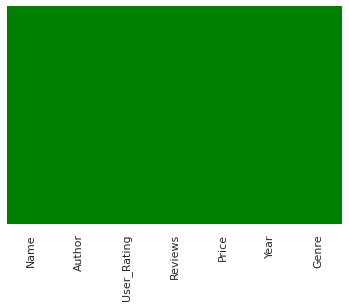

In [ ]:
# CEK ADA MISSING DATA OR NOT

data.isnull().sum()
sns.heatmap(data.isnull(), cbar=False, yticklabels=False,cmap = 'ocean')

# hasilnya dataku lengkap

**4. Konversi categorical data menjadi numeric**

In [ ]:
# Mengubah Categorical data jadi Numeric
# Categorical data =  kolom Name, kolom Author, sama kolom Genre
# Numeric Data = kolom User_Rating, Reviews, Price, Year

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data.Author = label_encoder.fit_transform(data.Author)
data.Genre = label_encoder.fit_transform(data.Genre)

dict1 = {'Author' : data.Author, 'Rating' : data.User_Rating, 'Reviews' : data.Reviews, 'Price' : data.Price, 'Year' : data.Year, 'Genre' : data.Genre}
data = pd.DataFrame(dict1)

data

,Author,Rating,Reviews,Price,Year,Genre
0,114,4.7,17350,8,2016,1
1,219,4.6,2052,22,2011,0
2,134,4.7,18979,15,2018,1
3,95,4.7,21424,6,2017,0
4,174,4.8,7665,12,2019,1
...,...,...,...,...,...,...
545,120,4.9,9413,8,2019,0
546,121,4.7,14331,8,2016,1
547,121,4.7,14331,8,2017,1
548,121,4.7,14331,8,2018,1


**5. Scaling data**

In [ ]:
# CEK SCALING DATA APAKAH SETARA ATAU TIDAK
# scaling dipakai ketika jarak rentang datanya ga masuk akal, jadi perlu disetarakan

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = ["Author", "Rating", "Reviews", "Price", "Year", "Genre"])

data

,Author,Rating,Reviews,Price,Year,Genre
0,0.461538,0.8750,0.197178,0.076190,0.7,1.0
1,0.886640,0.8125,0.022949,0.209524,0.2,0.0
2,0.542510,0.8750,0.215730,0.142857,0.9,1.0
3,0.384615,0.8750,0.243577,0.057143,0.8,0.0
4,0.704453,0.9375,0.086875,0.114286,1.0,1.0
...,...,...,...,...,...,...
545,0.485830,1.0000,0.106783,0.076190,1.0,0.0
546,0.489879,0.8750,0.162794,0.076190,0.7,1.0
547,0.489879,0.8750,0.162794,0.076190,0.8,1.0
548,0.489879,0.8750,0.162794,0.076190,0.9,1.0


**6. Menentukan variabel X dan y**

In [ ]:
X = np.array(data[['Author', 'Rating', 'Reviews', 'Price']])                # data yang akan diolah
y = np.array(data['Genre'])                                                 # data target/ final yg diharapkan

**7. Menentukan test dan training data**

In [ ]:
# BUAT TRAINING DAN TEST DATA

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440, 4)
(110, 4)
(440,)
(110,)


### **B. BUILD FUNCTION**

**8. Perhitungan dengan berbagai fungsi jarak**

Import library untuk menghitung jarak spasial

In [ ]:
import scipy.spatial.distance as dst

Deklarasi fungsi masing-masing jarak

i) Impor library macam-macam jarak dari scipy.spatial.distance

In [ ]:
# Euclidean
dst.euclidean([0,0], [1,1])

# Manhattan/ Cityblock
dst.cityblock([0,0], [1,1])

# Minkowski
dst.minkowski([0,0], [1,1])

# Chebyshev
dst.chebyshev([0,0], [1,1])

# Bray-Curtis
dst.braycurtis([0,0], [1,1])

# Canberra
dst.canberra([0,0], [1,1])


2.0

ii) Deklarasi fungsi KNN perhitungan jarak

In [ ]:
# 1. Fungsi Jarak Euclidean

def _knn_euclidean(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.euclidean(x, x_latih) for x_latih in X_train]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_train[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_euclidean(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_euclidean(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
# 2. Fungsi Jarak Manhattan/ Cityblock 

def _knn_cityblock(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.cityblock(x, x_latih) for x_latih in X_train]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_train[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_cityblock(X_train, y_train, k, x_baru):
    y_pred= [_knn_cityblock(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
# 3. Fungsi Jarak Minkowski

def _knn_minkowski(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.minkowski(x, x_latih) for x_latih in X_train]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_train[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_minkowski(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_minkowski(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
# 4. Fungsi Jarak Chebyshev

def _knn_chebyshev(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.chebyshev(x, x_latih) for x_latih in X_train]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_train[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_chebyshev(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_chebyshev(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
# 5. Fungsi Jarak Bray-Curtis

def _knn_braycurtis(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.braycurtis(x, x_latih) for x_latih in X_train]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_train[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_braycurtis(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_braycurtis(x_i) for x_i in x_baru]
    return np.array(y_pred)

In [ ]:
# 6 . Fungsi Jarak Canberra

def _knn_canberra(x):
    # Menghitung jarak antara x baru dengan semua sampel di data latih
    jarak = [dst.canberra(x, x_latih) for x_latih in X_train]
    # Mengurutkan data dan mengambil sejumlah k objek
    k_idx = np.argsort(jarak)[: k]
    # Mengambil kelas dari k tetangga terdekat dari data latih
    k_neighbor_labels = [y_train[i] for i in k_idx]
    # Mengambil kelas yang paling sering muncul
    kelas_paling_banyak = Counter(k_neighbor_labels).most_common(1)
    return kelas_paling_banyak[0][0]

def KNN_canberra(X_latih, y_latih, k, x_baru):
    y_pred= [_knn_canberra(x_i) for x_i in x_baru]
    return np.array(y_pred)

iii) Import library untuk fungsi evaluasi

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

iv) Definisi fungsi untuk plot data

In [ ]:
def bar_plot(df, evalf):

    # Memilih tema plot
    sns.set_theme(style="whitegrid")

    # Membuat sebuah figure dan sebuah axes
    fig, ax=plt.subplots(figsize=(10,8)) # figsize=(x,y) untuk menentukan ukuran gambar

    # Melakukan bar plot
    ax = sns.barplot(data=df,               # Nama DataFrame
                     y=evalf,               # Data sumbu Y
                     x=df.index             # Data sumbu X

                    )
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    # Mengatur sudut rotasi label stepsize sumbu x
    plt.xticks(rotation=80)

    # Mengganti label sumbu x
    ax.set_xlabel('distance')

    # Mengganti label sumbu y
    ax.set_ylabel('{} score'.format(evalf))

    # Mengatur Judul Gambar
    ax.set_title('Evaluation Score of KNN with Various Distance', fontsize=16, fontweight='bold')

    # Menampilkan Gambar
    plt.show()

### **C. EKSPERIMEN**

In [ ]:
# PARAMETER K (random value)
k = 3

In [ ]:
# KNN Euclidean Distance

start = time.time()
y_pred=KNN_euclidean(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start

# Evaluation
euclidean =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]

euclidean

[0.7727272727272727,
 0.7847792723661642,
 0.7727272727272727,
 0.7735742518351214,
 0.6776270866394043]

In [ ]:
# KNN Manhattan Distance

start = time.time()
y_pred=KNN_cityblock(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start

# Evaluation
manhattan =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
manhattan

[0.7818181818181819,
 0.7832121212121212,
 0.7818181818181819,
 0.7822561513428024,
 0.5085165500640869]

In [ ]:
# KNN Minkowski Distance

start = time.time()
y_pred=KNN_minkowski(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start

# Evaluation
minkowski =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
minkowski

[0.7727272727272727,
 0.7847792723661642,
 0.7727272727272727,
 0.7735742518351214,
 0.6688418388366699]

In [ ]:
# KNN Chebishev Distance

start = time.time()
y_pred=KNN_chebyshev(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start

# Evaluation
chebyshev =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
chebyshev

[0.7727272727272727,
 0.7751291579806037,
 0.7727272727272727,
 0.7733533683946908,
 0.4324226379394531]

In [ ]:
# KNN BrayCurtis Distance

start = time.time()
y_pred=KNN_braycurtis(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start

# Evaluation
braycurtis =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
braycurtis

[0.7909090909090909,
 0.793238466418925,
 0.7909090909090909,
 0.7914850989231155,
 0.7967877388000488]

In [ ]:
# KNN Canberra Distance

start = time.time()
y_pred=KNN_canberra(X_train, y_train, k, X_test)
finish = time.time()
time_comp = finish-start

# Evaluation
canberra =[accuracy_score(y_test, y_pred),
 precision_score(y_test, y_pred, average='weighted'),
 recall_score(y_test, y_pred, average='weighted'),
 f1_score(y_test, y_pred, average='weighted'),
 time_comp]
 
canberra

[0.7545454545454545,
 0.7537723643936765,
 0.7545454545454545,
 0.7525590688381386,
 1.8066461086273193]

In [ ]:
# Membuat dataframe baru

df = pd.DataFrame([euclidean,
 manhattan,
 minkowski,
 chebyshev,
 braycurtis,
 canberra],
 columns = ['accuracy','precision', 'recall', 'f1', 'time'],
 index = ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'braycurtis', 'canberra'])

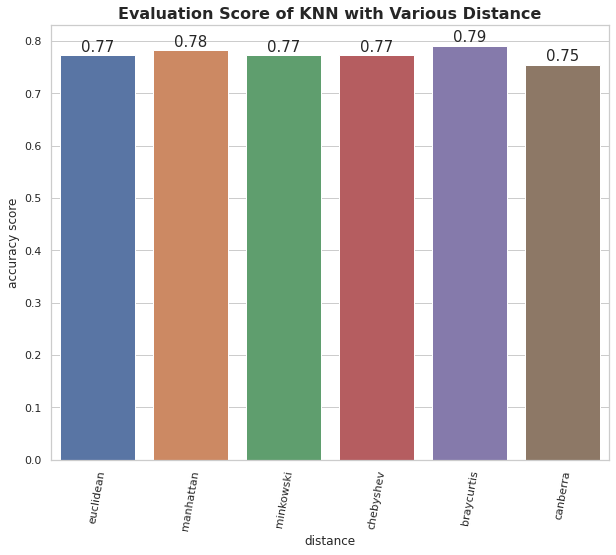

In [ ]:
# Perbandingan akurasi dari masing-masing fungsi jarak
bar_plot(df, 'accuracy')

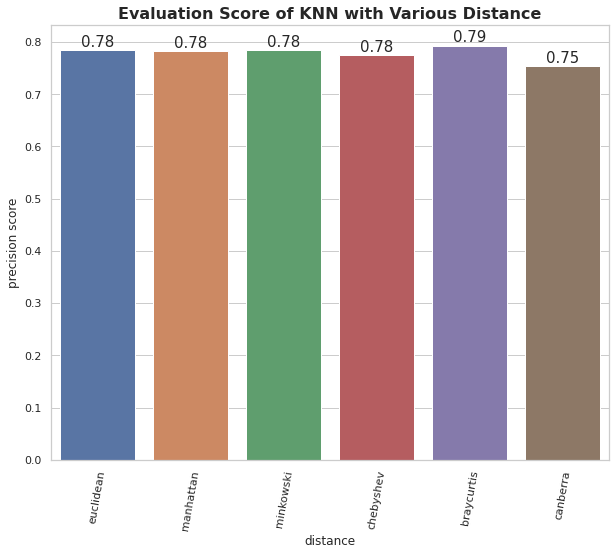

In [ ]:
# Perbandingan presisi dari masing-masing fungsi jarak
bar_plot(df, 'precision')

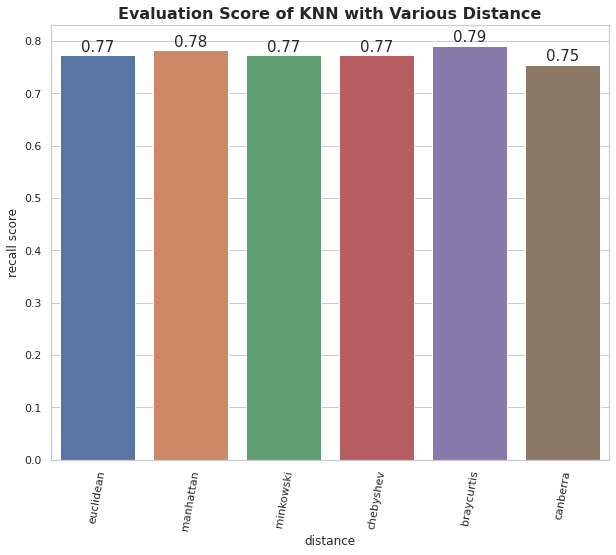

In [ ]:
# Perbandingan sensitivitas dari masing-masing fungsi jarak
bar_plot(df, 'recall')

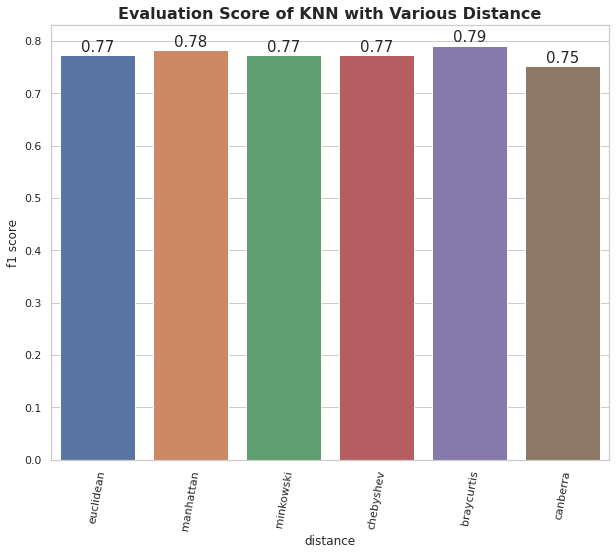

In [ ]:
# Perbandingan rata-rata presisi dan recall dari masing-masing fungsi jarak
bar_plot(df, 'f1')

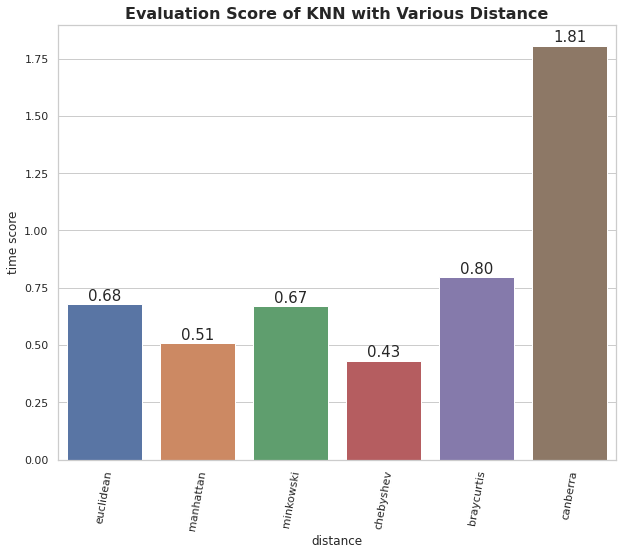

In [ ]:
# Perbandingan waktu dari masing-masing fungsi jarak
bar_plot(df, 'time')

## ***Analisis dan Kesimpulan***

***Analisis:***

1. Nilai akurasi paling tinggi dari masing-masing perhitungan jarak diperoleh oleh rumus Bray-Curtis dengan nilai sebesar 0.79 atau artinya 79% datanya akurat. Sedangkan yang paling rendah adalah ketika menggunakan rumus Canberra dengan hasil sebesar 0.75 atau 75% akurat.

2. Nilai presisi paling tinggi dari masing-masing perhitungan jarak diperoleh oleh rumus Bray-Curtis dengan nilai sebesar 0.79 atau artinya 79% datanya akurat. Sedangkan yang paling rendah adalah rumus Canberra dengan hasil sebesar 0.75 atau 75% akurat.

3. Nilai sensitivitas/ recall paling tinggi dari masing-masing perhitungan jarak diperoleh oleh rumus Bray-Curtis dengan nilai sebesar 0.79 atau artinya 79% datanya akurat. Sedangkan yang paling rendah adalah Canberra dengan hasil sebesar 0.75 atau 75% akurat.

4. Nilai perbandingan rata-rata presisi dan recall (f1-score) paling tinggi dari masing-masing perhitungan jarak diperoleh oleh rumus Bray-Curtis dengan nilai sebesar 0.79 atau artinya 79% datanya akurat. Sedangkan yang paling rendah adalah rumus Canberra dengan hasil sebesar 0.75 atau 75% akurat.

5. Nilai waktu pengolahan data paling cepat adalah ketika menggunakan rumus Chebyshev dengan hasil sebesar 0.43. Sedangkan yang paling lambat adalah ketika menggunakan rumus Canberra dengan perolehan nilai 1.81.

***Kesimpulan:***

Rumus jarak terakurat, terpresisi, tersensitif, dan paling besar f1-scorenya adalah Bray-Curtis.

Rumus jarak dengan waktu eksekusi paling cepat adalah Chebyshev.